# UFC: Statistik, Stjärnor och Dominans i Oktagonen

Mixed Martial Arts (MMA) är en sport som kräver en otrolig kombination av styrka, teknik och strategi. UFC är epicentrum för denna actionfyllda värld. Men vilka är de riktiga dominanterna i oktagonen? Vilka fighters har flest vinster och minst förluster? Med hjälp av dataanalys och interaktiva visualiseringar har vi skapat en bild av UFC:s stjärnor – viktklass för viktklass.

## Inledning
Mixed Martial Arts (MMA) har vuxit exponentiellt i popularitet de senaste åren, med Ultimate Fighting Championship (UFC) i spetsen. Att förstå vilka fighters som dominerar i sina respektive viktklasser kan ge insikt i sportens dynamik och utveckling. I detta projekt visualiseras UFC:s toppfighters i olika viktklasser baserat på antalet vinster och deras förluster.  Data hämtas från en kombination av dataset och web scraping från UFC:s hemsida. Vi visualiserar sedan dessa data genom att skapa anpassade diagram som inkluderar bilder av varje fighter för ett mer interaktivt och engagerande resultat.

## Statistiken bakom sporten
Med data från UFC:s officiella statistikportal har vi tillgång till information om hundratals fighters – deras vinster, förluster och viktklasser. Genom att kategorisera dessa fighters baserat på deras vikt kan vi se tydliga mönster i hur olika viktklasser presterar. Viktklasser som Lightweight och Welterweight framträder som de mest konkurrenskraftiga, med ett stort antal fighters som tävlar på högsta nivå.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import string
# Base URL
base_url = "http://www.ufcstats.com/statistics/fighters?char="

# All letters from a to z
letters = list(string.ascii_lowercase)

# Initialize an empty list to store DataFrames
data_frames = []

# Loop through each letter
for letter in letters:
    page_url = base_url + letter + "&page=all"
    
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract table
    table = soup.find('table', class_='b-statistics__table')
    
    if table:  # Ensure the table is not None
        try:
            data = pd.read_html(str(table), flavor='bs4')[0]
            data_frames.append(data)  # Add to the list of DataFrames
        except Exception as e:
            print(f"Failed to parse table for {page_url}: {e}")
    else:
        print("")

## UFC:s Viktklasser – Från Lättviktiga Talanger till Tunga Giganter
UFC:s fighters tävlar inom en rad viktklasser, från de lättaste atleterna till de tyngsta giganterna. Visualiseringarna visar samtliga viktklasser och ger en fullständig bild av sporten. Varje klass, med sina unika dynamiker och stjärnor, presenteras i resultaten och belyser de toppfighters som dominerar inom sin kategori.

## Organisering och viktklasser
När datan var insamlad behövde den bearbetas. Viktinformationen rensades och konverterades till numeriska format, och fighters med saknade värden kompletterades med det vanligaste vikten i datasetet. Därefter definierades gränser för olika viktklasser – från Strawweight till Heavyweight – och varje fighter tilldelades sin respektive viktklass.

Med detta steg kunde vi skapa en struktur där varje fighter är korrekt kategoriserad, vilket gör det möjligt att analysera och jämföra prestationer inom och mellan viktklasser.

För att skapa en tydligare överblick delades datasetet upp i separata tabeller för varje viktklass. Här fokuserade vi på att identifiera de allra bästa i varje klass – de fighters som har flest vinster och färre än fem förluster.

Genom detta steg kunde vi se vilka viktklasser som är mest konkurrenskraftiga och vilka fighters som verkligen sticker ut som stjärnor i sporten.

In [3]:
import pandas as pd
import numpy as np

if data_frames:  
    combined_data = pd.concat(data_frames, ignore_index=True)
    
    # Drop rows where all columns are NaN (optional cleanup)
    combined_data.dropna(how='all', inplace=True)
    
    # Reset the index
    combined_data.reset_index(drop=True, inplace=True)
else:
    print("No data was scraped.")
    exit()

# Define weight classes with lower and upper limits
weight_classes = [
    {"class_name": "Strawweight", "lower_limit": 0, "upper_limit": 115},
    {"class_name": "Flyweight", "lower_limit": 115, "upper_limit": 125},
    {"class_name": "Bantamweight", "lower_limit": 125, "upper_limit": 135},
    {"class_name": "Featherweight", "lower_limit": 135, "upper_limit": 145},
    {"class_name": "Lightweight", "lower_limit": 145, "upper_limit": 155},
    {"class_name": "Super lightweight", "lower_limit": 155, "upper_limit": 165},
    {"class_name": "Welterweight", "lower_limit": 165, "upper_limit": 170},
    {"class_name": "Super welterweight", "lower_limit": 170, "upper_limit": 175},
    {"class_name": "Middleweight", "lower_limit": 175, "upper_limit": 185},
    {"class_name": "Super middleweight", "lower_limit": 185, "upper_limit": 195},
    {"class_name": "Light heavyweight", "lower_limit": 195, "upper_limit": 205},
    {"class_name": "Cruiserweight", "lower_limit": 205, "upper_limit": 225},
    {"class_name": "Heavyweight", "lower_limit": 225, "upper_limit": 265},
    {"class_name": "Super heavyweight", "lower_limit": 265, "upper_limit": float('inf')}
]

# Function to map weight to weight class
def assign_weight_class(weight):
    for weight_class in weight_classes:
        if weight_class["lower_limit"] < weight <= weight_class["upper_limit"]:
            return weight_class["class_name"]
    return None

# Ensure the 'Wt.' column is treated as strings (in case of mixed types)
combined_data['Wt.'] = combined_data['Wt.'].astype(str)

# Clean the weight column by removing 'lbs.' and stripping spaces
combined_data['Wt.'] = combined_data['Wt.'].str.replace('lbs.', '', regex=False).str.strip()

# Convert the cleaned weights to numeric values
combined_data['Wt.'] = pd.to_numeric(combined_data['Wt.'], errors='coerce')

# Handle missing weights (Option: Fill missing with the most common weight)
most_common_weight = combined_data['Wt.'].mode()[0]  # Most frequent weight in the dataset
combined_data['Wt.'].fillna(most_common_weight, inplace=True)

# Assign fighters to weight classes
combined_data['Weight Class'] = combined_data['Wt.'].apply(assign_weight_class)

# Print the count of fighters in each weight class
print(combined_data['Weight Class'].value_counts())


Lightweight           737
Welterweight          636
Middleweight          540
Featherweight         488
Bantamweight          475
Light heavyweight     409
Heavyweight           346
Flyweight             316
Strawweight           138
Cruiserweight          86
Super heavyweight      46
Super middleweight     25
Super lightweight      18
Super welterweight      4
Name: Weight Class, dtype: int64


## Visualisering med bilder
Det mest visuellt engagerande steget i projektet var att skapa diagram som visar de topp 10 fighters i varje viktklass. Här representerar staplarnas höjd antalet vinster, och ovanför varje stapel placerades en bild av fightern. För detta steg hämtades bilder från UFC:s officiella hemsida för att ge varje stapel ett ansikte.

Med dessa visualiseringar får vi en levande representation av datan, från siffror till faktiska personer som kliver in i oktagonen.

In [4]:
# Create a dictionary to store tables for each weight class
weight_class_tables = {}

# Loop through unique weight classes and filter data
for weight_class in combined_data['Weight Class'].unique():
    weight_class_tables[weight_class] = combined_data[combined_data['Weight Class'] == weight_class]

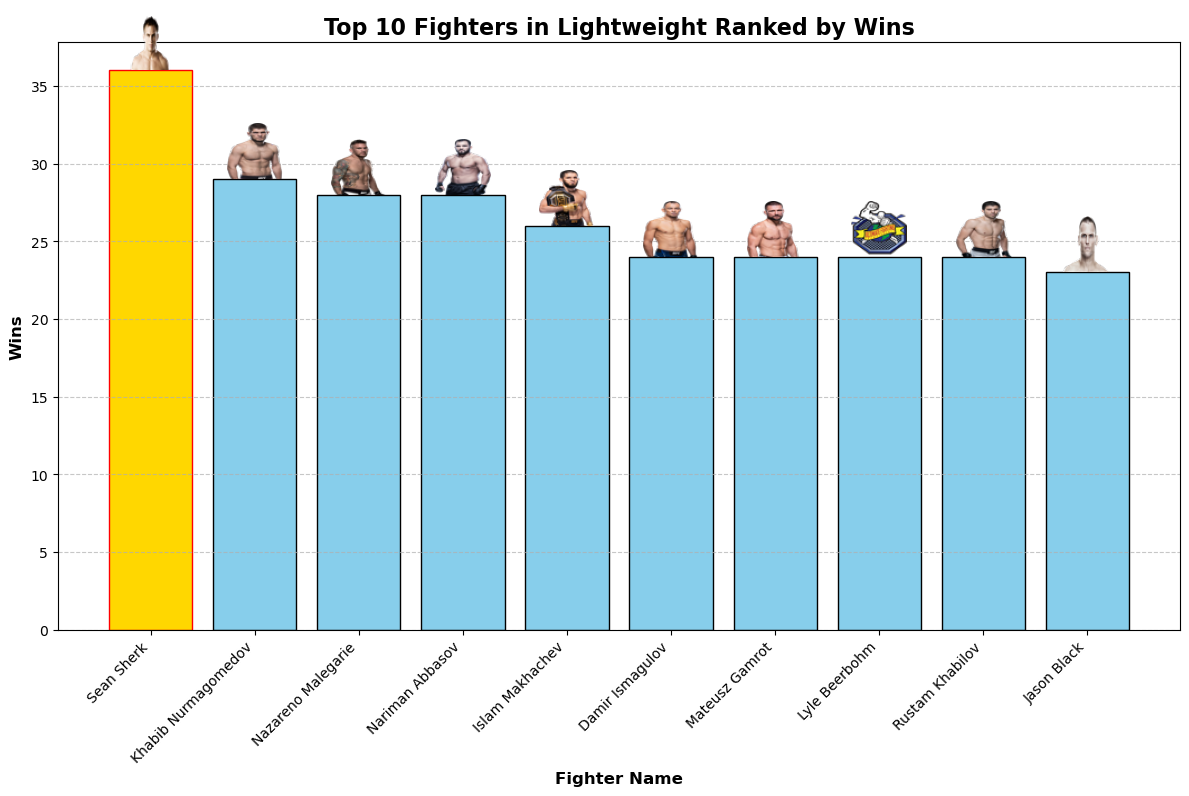

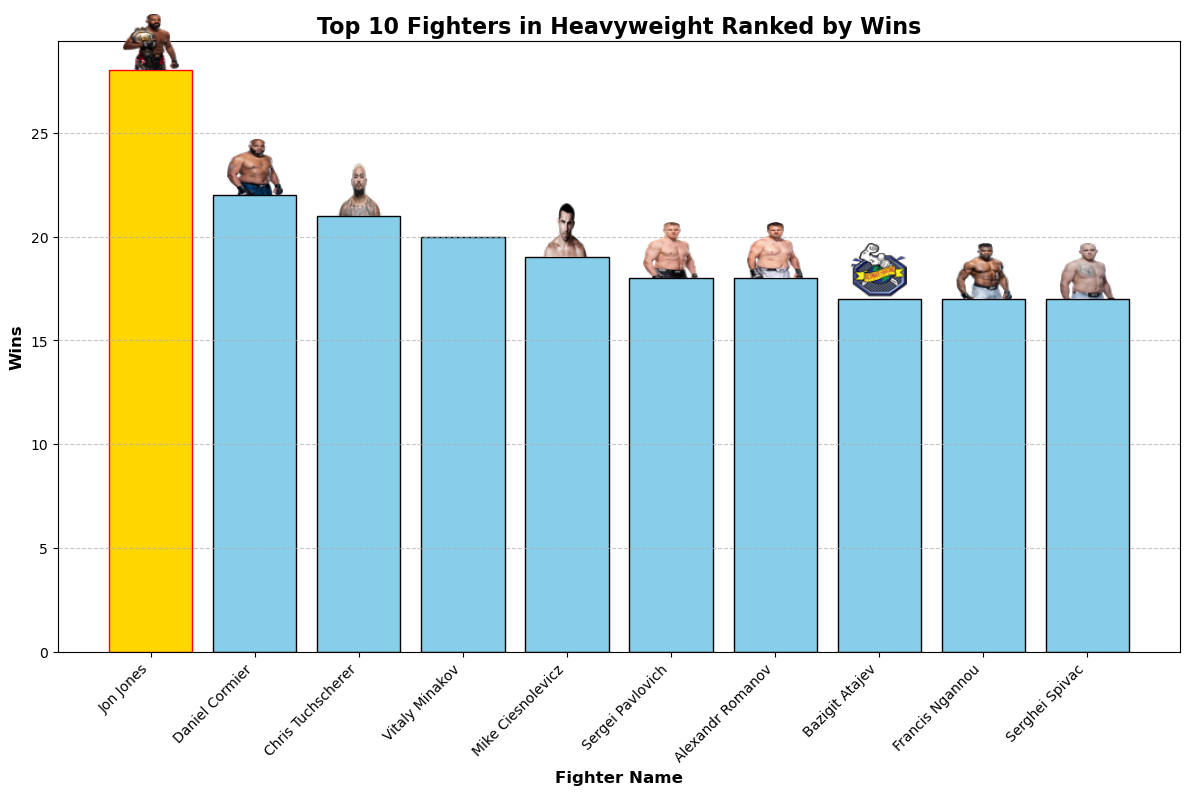

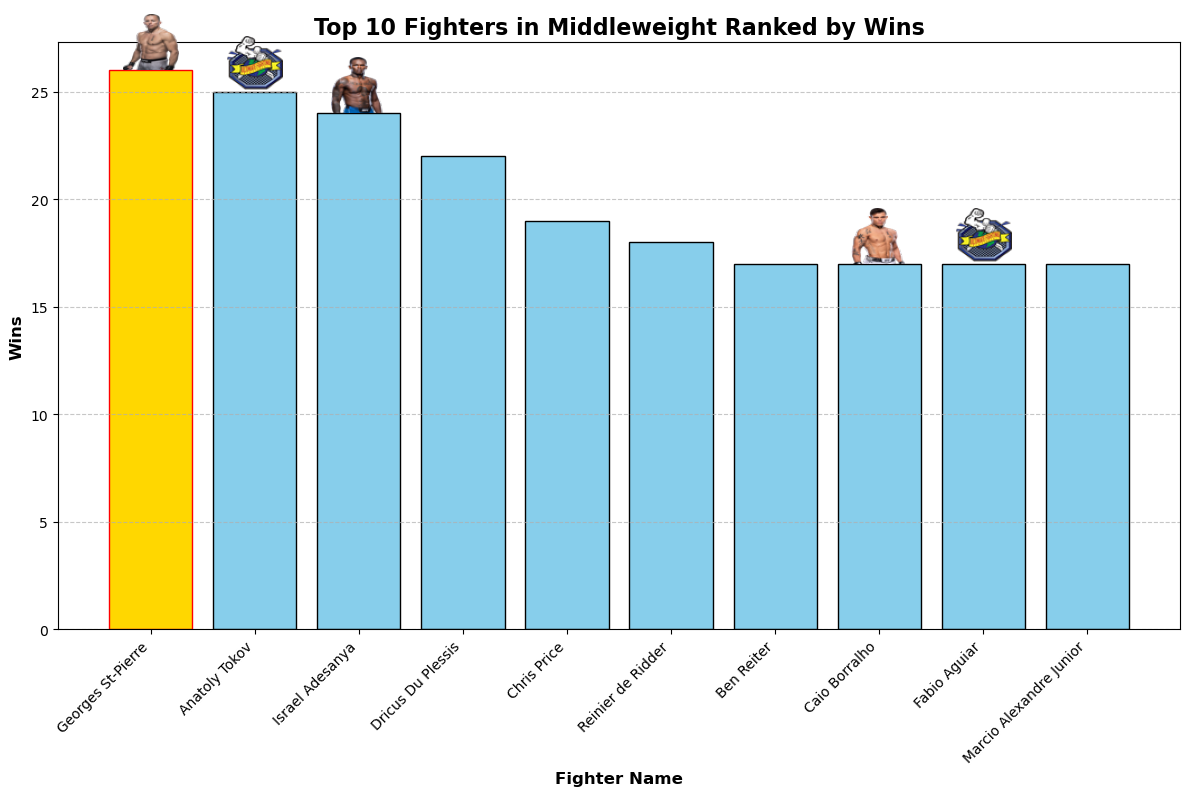

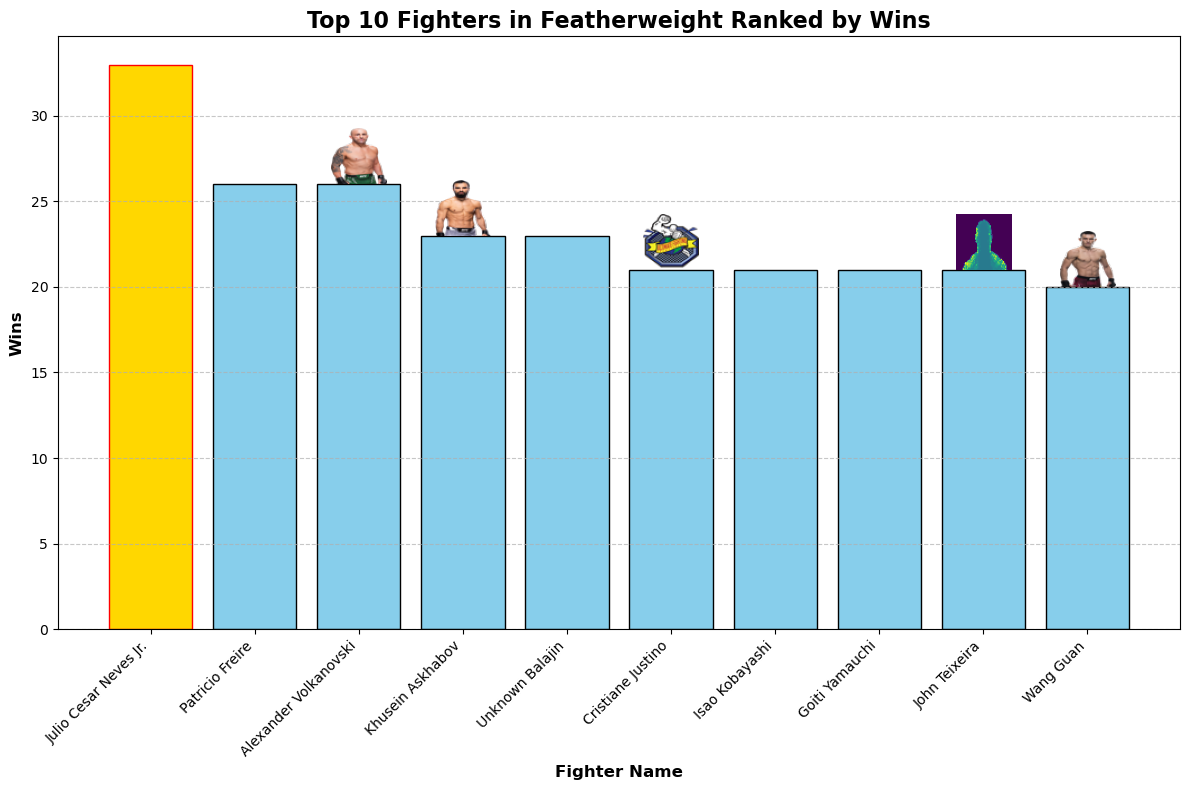

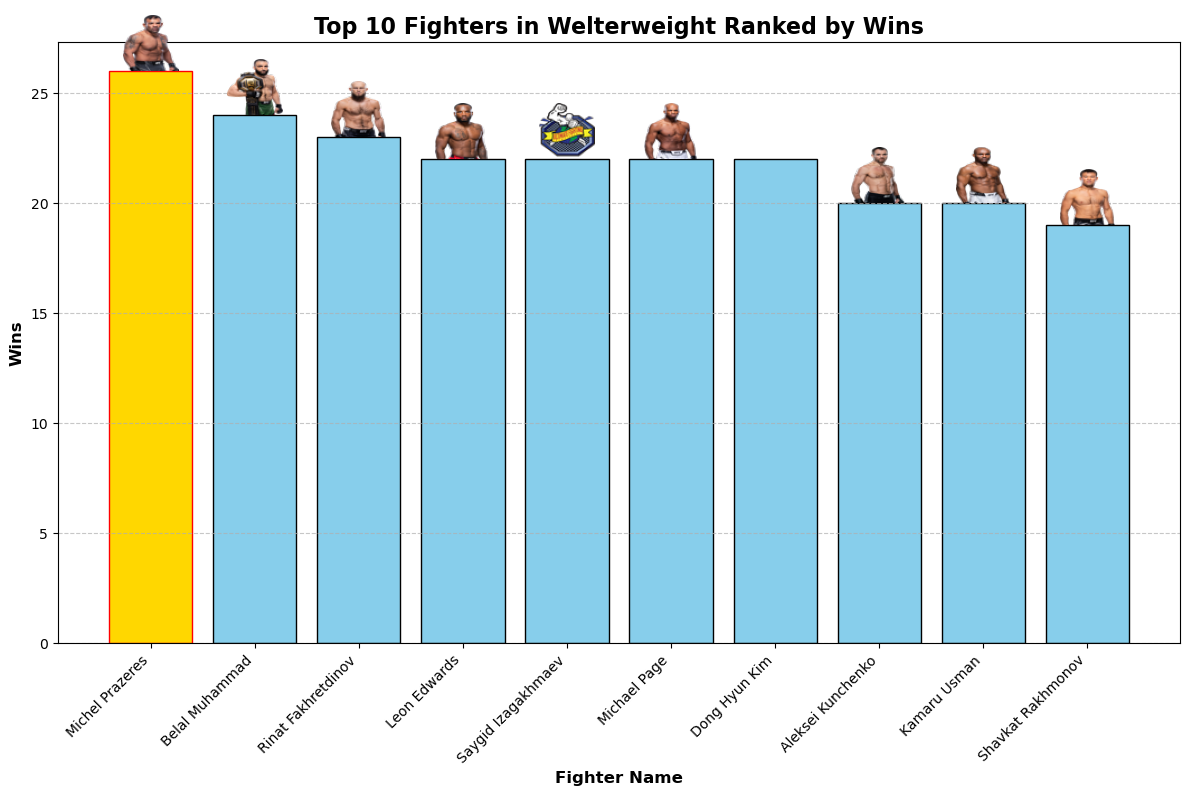

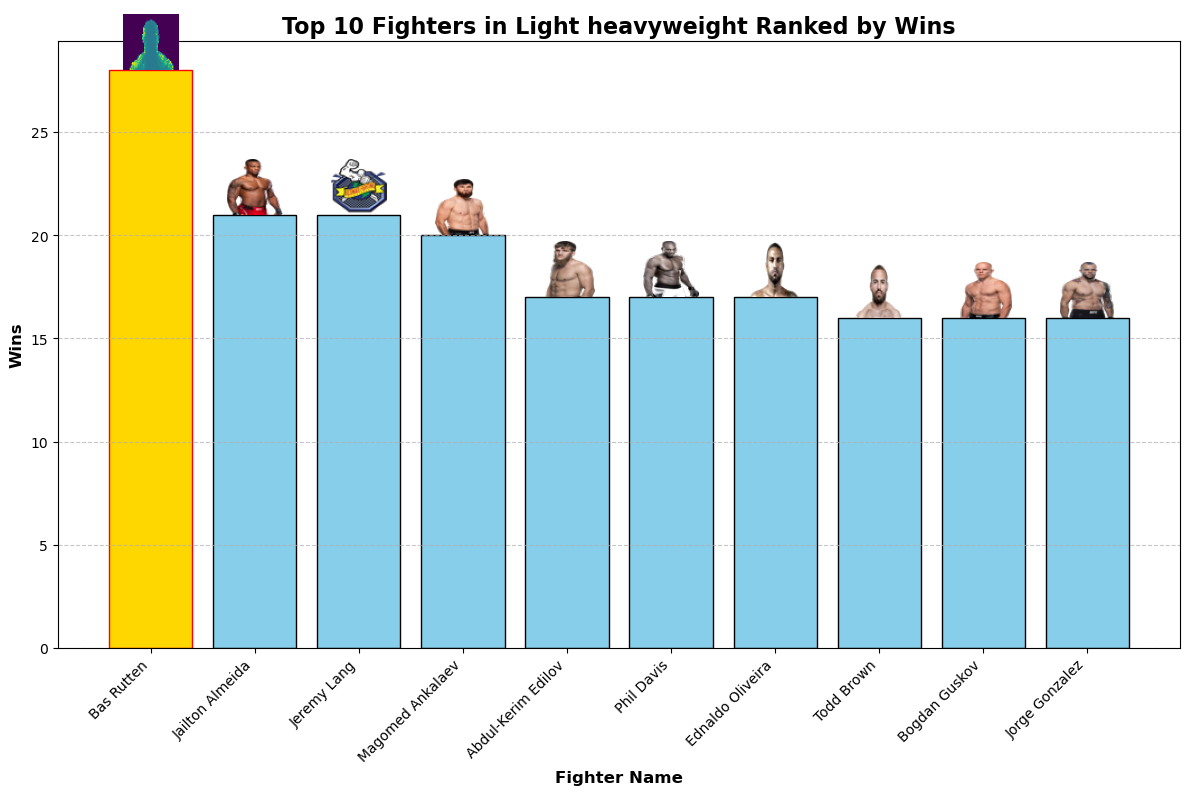

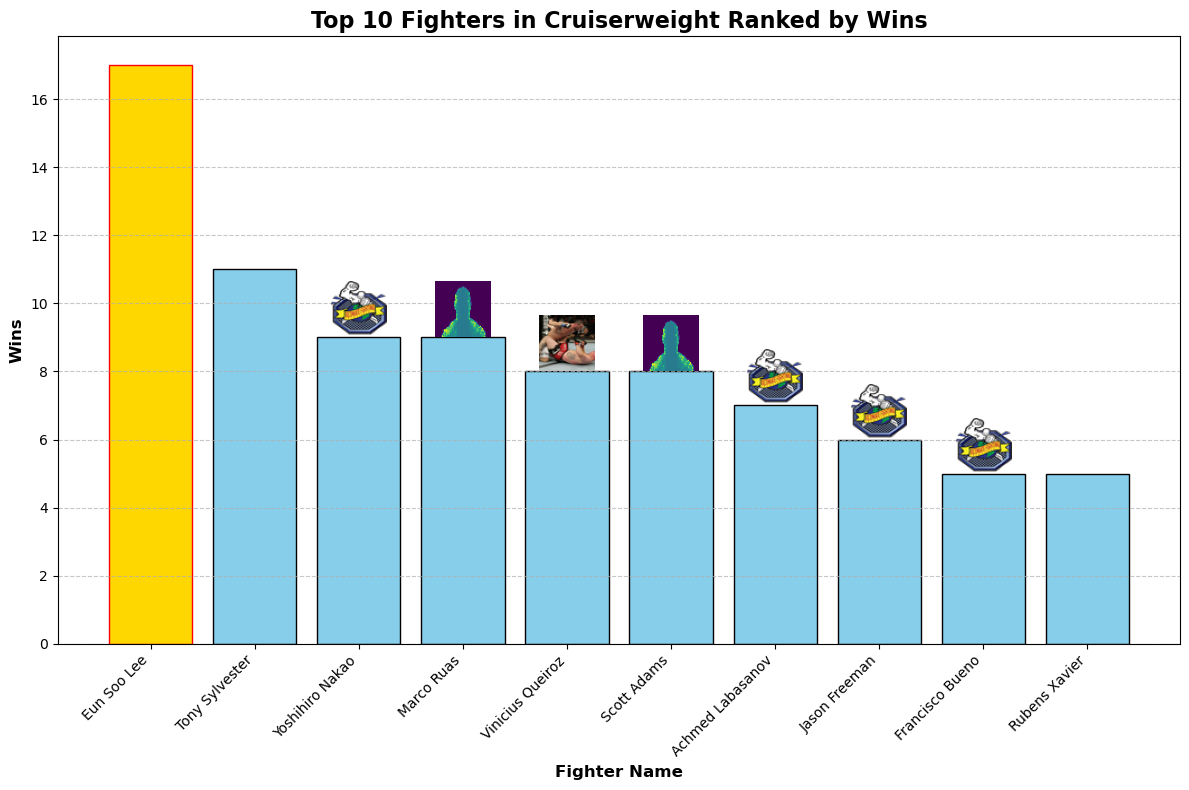

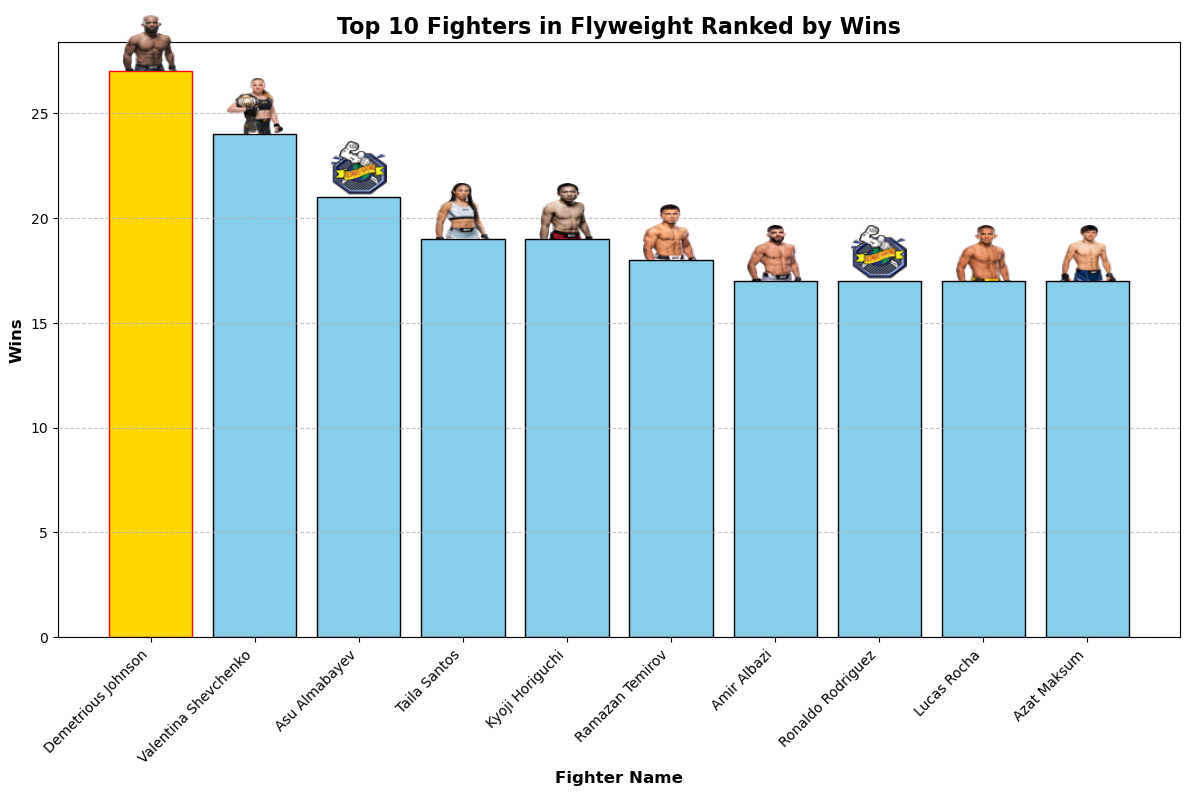

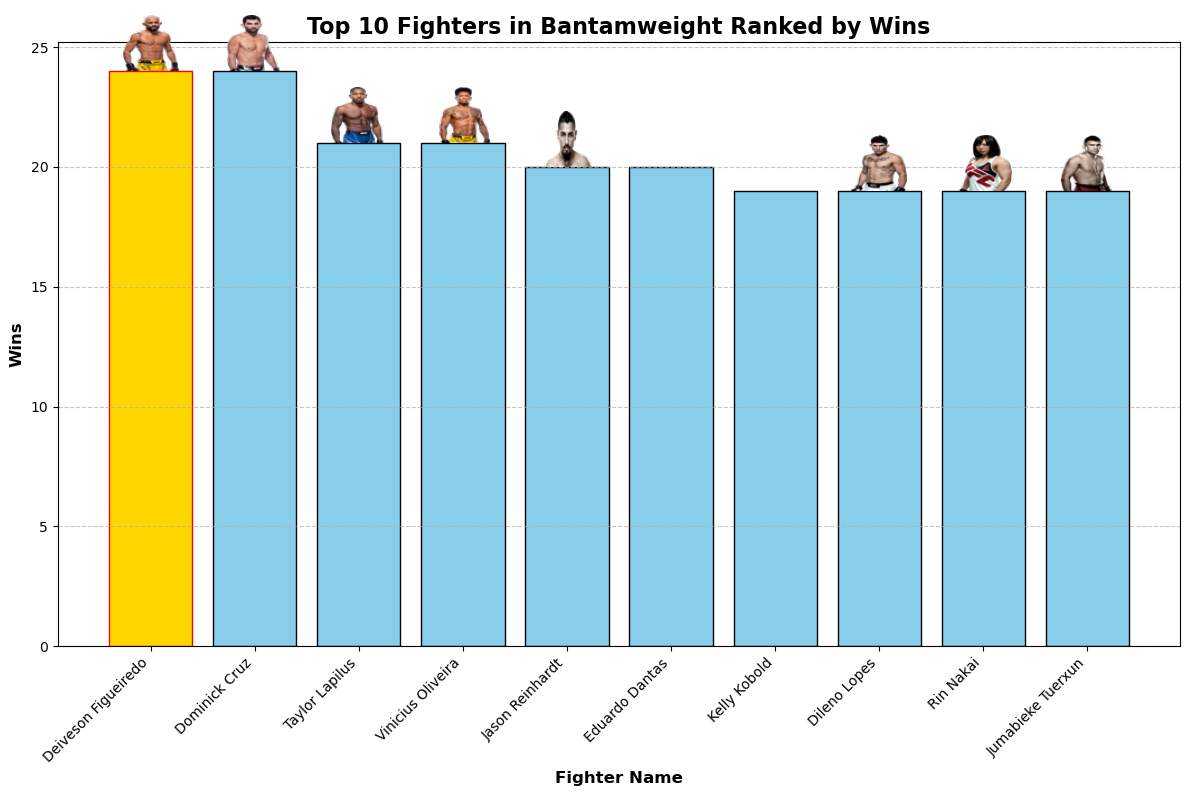

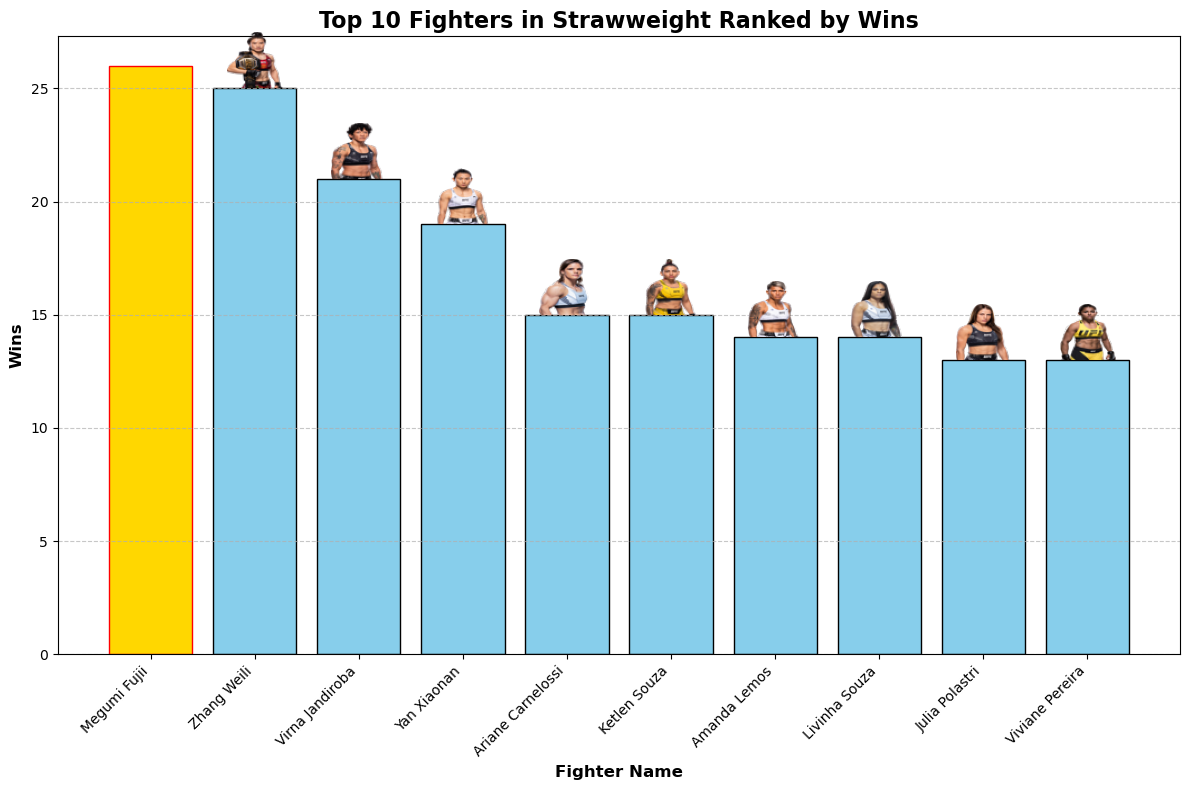

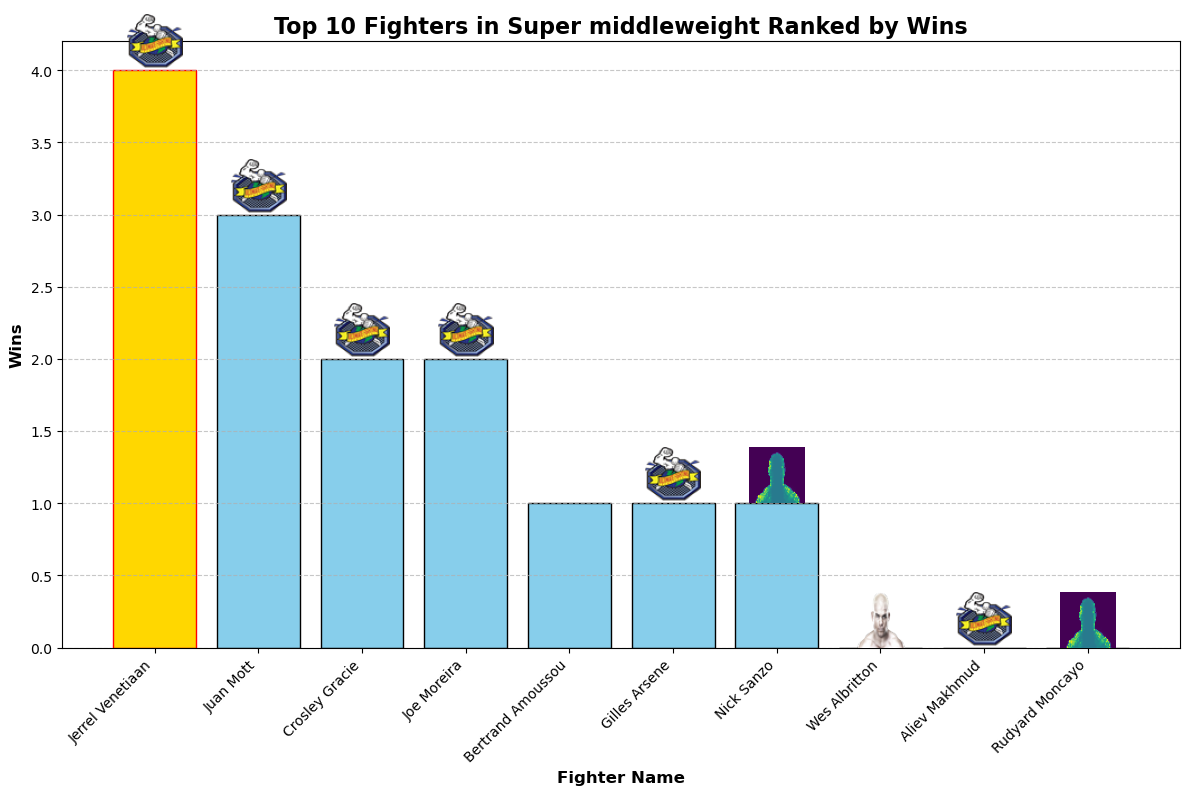

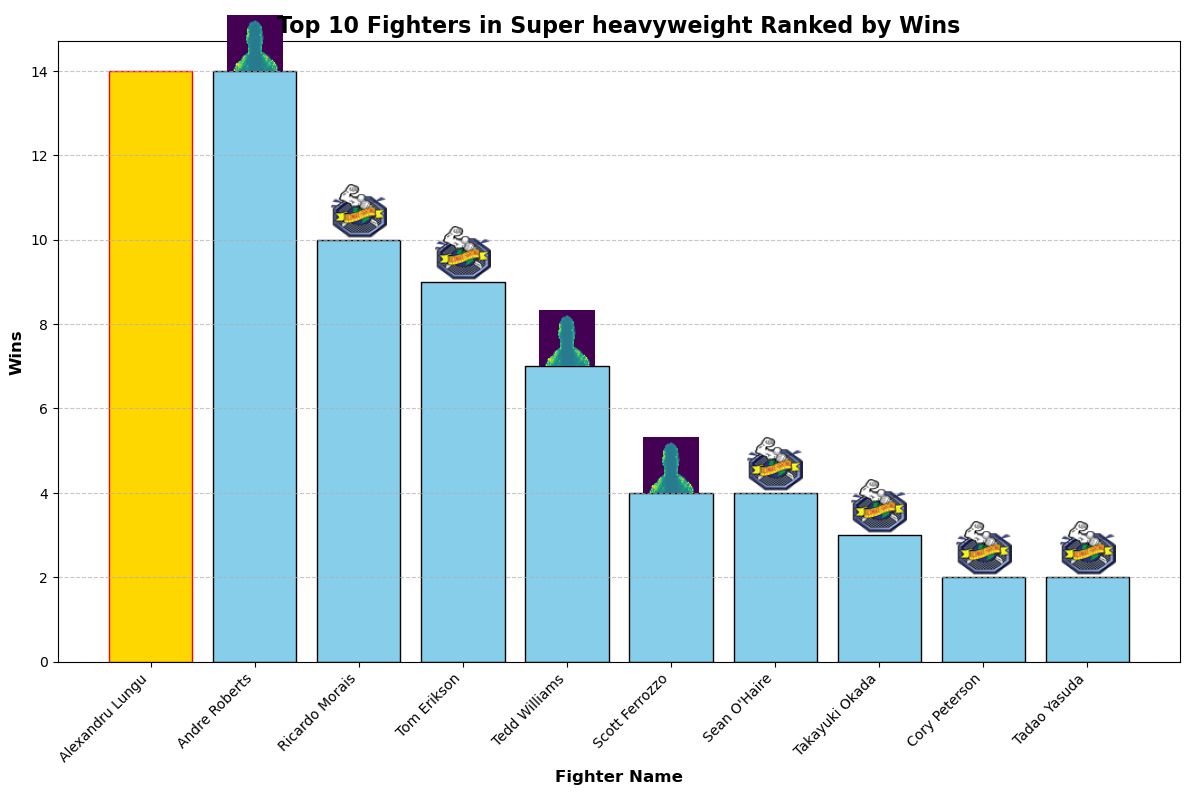

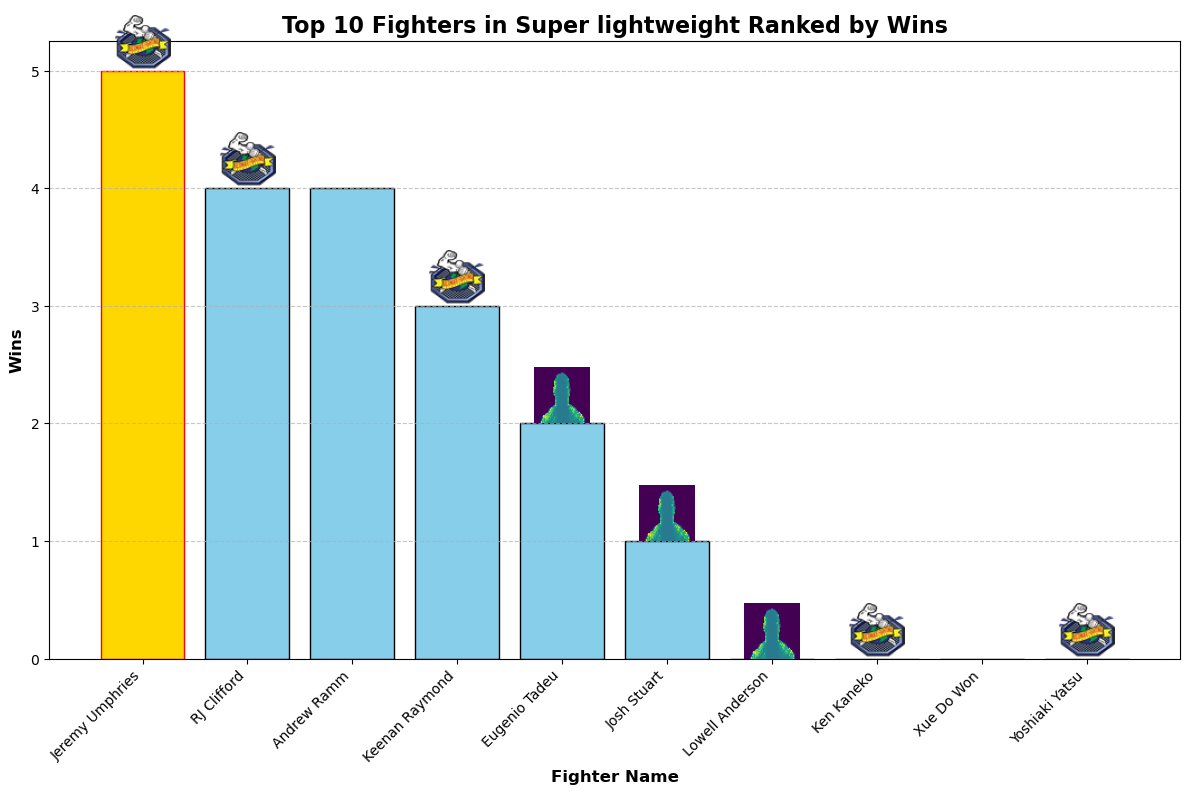

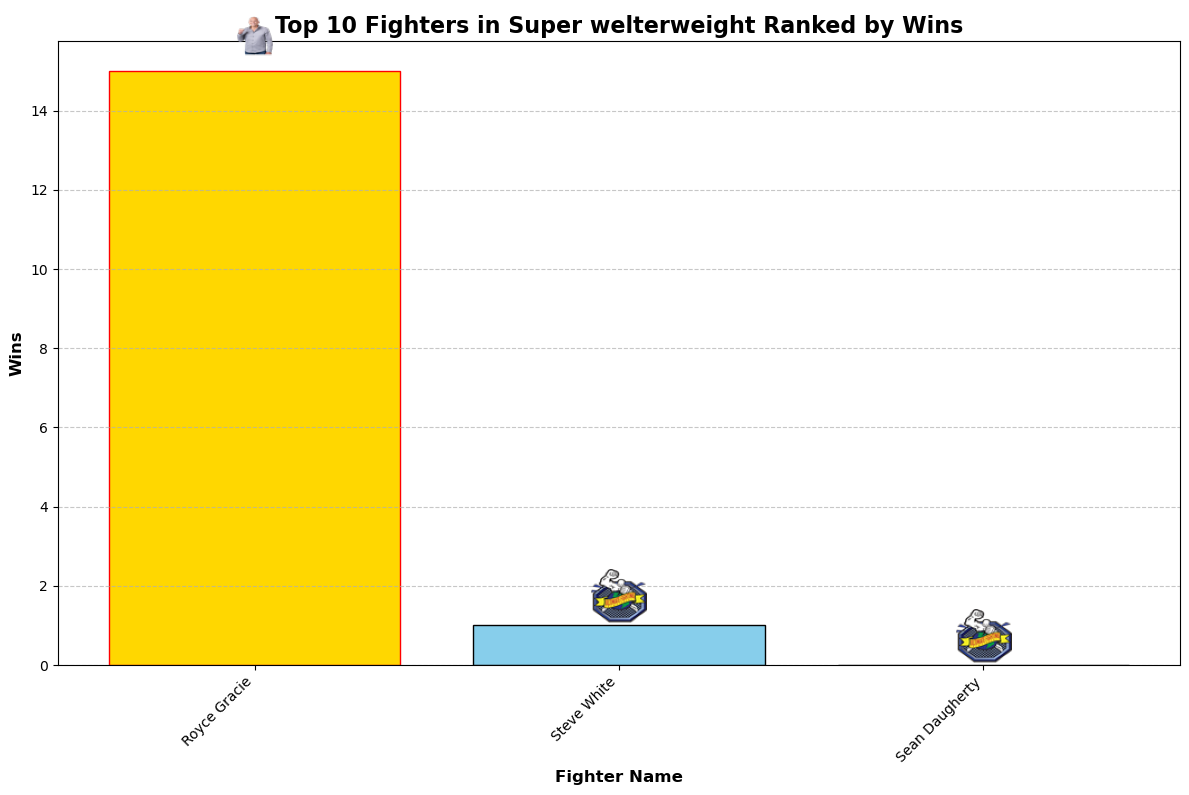

In [5]:
import os
import sys
import requests
import time
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Directory to save images
save_dir = "images"
os.makedirs(save_dir, exist_ok=True)

# Base URL for UFC fighter profiles
base_url = "https://www.ufc.com/athlete"

# Suppress Selenium logs
options = webdriver.ChromeOptions()
options.add_argument("--log-level=3")
driver = webdriver.Chrome(options=options)

# Redirect standard output and error
class SuppressOutput:
    def __enter__(self):
        self._stdout = sys.stdout
        self._stderr = sys.stderr
        sys.stdout = open(os.devnull, "w")
        sys.stderr = open(os.devnull, "w")

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout.close()
        sys.stderr.close()
        sys.stdout = self._stdout
        sys.stderr = self._stderr

# Iterate through each weight class
for weight_class in combined_data['Weight Class'].unique():
    # Filter the data for the current weight class and only include fighters with less than 5 losses
    class_data = combined_data[
        (combined_data['Weight Class'] == weight_class) & (combined_data['L'] < 5)
    ]
    
    # Sort fighters by their total wins in descending order and take the top 10
    top_fighters = class_data.sort_values(by='W', ascending=False).head(10)
    
    # Combine first and last names for labeling
    top_fighters['Name'] = top_fighters['First'].fillna('Unknown') + ' ' + top_fighters['Last'].fillna('Unknown')
    
    # Download images for the top fighters
    for fighter in top_fighters['Name']:
        search_name = fighter.replace(" ", "-").lower()
        fighter_url = f"{base_url}/{search_name}"
        
        try:
            # Suppress output during image download
            with SuppressOutput():
                driver.get(fighter_url)
                time.sleep(2)  # Allow the page to load
                img_element = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "img"))
                )
                img_url = img_element.get_attribute("src")
                img_response = requests.get(img_url)
                img_response.raise_for_status()
                img_name = f"{save_dir}/{fighter.replace(' ', '_')}.png"
                with open(img_name, "wb") as img_file:
                    img_file.write(img_response.content)
        except Exception:
            pass  # Ignore errors silently

    # Create a plot for the top fighters
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    
    # Add "invisible" bars to position the images
    plt.bar(top_fighters['Name'], top_fighters['W'], color='white', edgecolor='white')
    
    # Add fighter images to the plot
    for i, fighter in enumerate(top_fighters.itertuples()):
        try:
            # Load the fighter's image
            img_path = f"{save_dir}/{fighter.First}_{fighter.Last}.png"
            img = Image.open(img_path)
            img = img.resize((50, 50))  # Resize for consistency
            
            # Place the image above the corresponding bar
            imagebox = OffsetImage(img, zoom=0.8)
            ab = AnnotationBbox(imagebox, (i, fighter.W), frameon=False, box_alignment=(0.5, 0))
            ax.add_artist(ab)
        except FileNotFoundError:
            pass  # Ignore missing images silently
    
       # Add bars to represent wins
    bars = plt.bar(top_fighters['Name'], top_fighters['W'], color='skyblue', edgecolor='black')

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    # Add title, subtitle, and labels
    plt.title(f"Top 10 Fighters in {weight_class} Ranked by Wins", fontsize=16, fontweight='bold')
    plt.xlabel("Fighter Name", fontsize=12, fontweight='bold')
    plt.ylabel("Wins", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Highlight the top fighter with a unique bar color
    if len(bars) > 0:
        bars[0].set_color('gold')
        bars[0].set_edgecolor('red')

    # Add a tight layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Close the WebDriver
driver.quit()

## Avslutning – En Sport i Ständig Rörelse
Genom att analysera och visualisera UFC:s fighters har vi fått en tydligare bild av sportens struktur och dess dominanta stjärnor. Från de snabbaste, tekniska lättviktarna till de kraftfulla giganterna i de tyngsta klasserna visar resultaten att varje viktklass har sin egen unika dynamik och sina egna hjältar. Visualiseringarna låter oss inte bara se siffror och statistik – de ger oss en djupare förståelse för de fighters som skriver sportens historia i oktagonen.

Men sporten är i ständig förändring. Nya namn stiger fram, gamla rivaliteter återuppstår, och varje match kan omdefiniera hierarkin. Det är denna rörelse, denna oförutsägbarhet, som gör UFC och MMA så fängslande. Så nästa gång du ser en match, vet du att bakom varje slag finns statistik, strategier och en berättelse om att bli bäst i världen. Och det är bara början.